In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("pydbm")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)

In [3]:
def generate_sin(amp=0.5, sampling_freq=8000, freq=440, sec=5, extract_n=100):
    sin_list = []
    for n in np.arange(sampling_freq * sec):
        sin = amp * np.sin(2.0 * np.pi * freq * n / sampling_freq)
        sin_list.append(sin)
        if len(sin_list) > extract_n:
            break
    return np.array(sin_list[:extract_n])


In [4]:
# The number of sampled data.
sample_n = 1000
# The length of one cycle.
cycle_len = 5
# The number of features.
feature_n = 5

# The list of observed data points.
observed_arr_list = []

for i in range(sample_n):
    f_list = []
    for j in range(feature_n):
        sin_arr = generate_sin(freq=440, extract_n=cycle_len)
        noise_arr = np.random.normal(loc=0.0, scale=1.5, size=cycle_len)
        sin_arr += noise_arr
        f_list.append(sin_arr)

    observed_arr_list.append(f_list)

observed_arr = np.array(observed_arr_list)
#observed_arr = (observed_arr - observed_arr.mean()) / observed_arr.std()
#observed_arr = np.tanh(observed_arr)
observed_arr = (observed_arr - observed_arr.min()) / (observed_arr.max() - observed_arr.min())
observed_arr.shape

(1000, 5, 5)

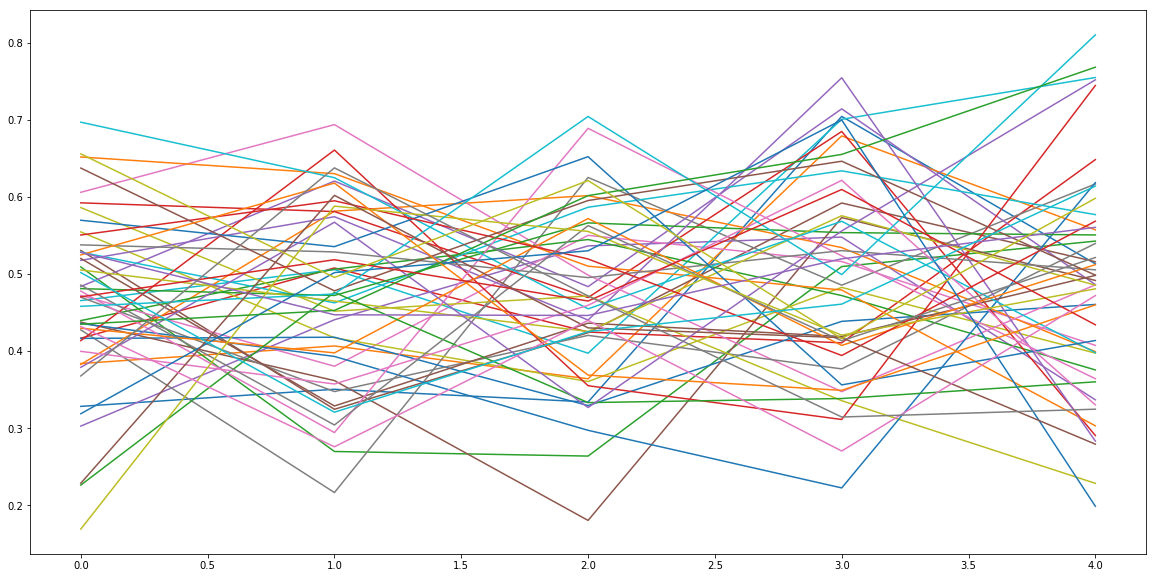

In [5]:
fig = plt.figure(figsize=(20, 10))
for i in range(10):
    plt.plot(observed_arr[i])
plt.show();plt.close()

In [6]:
# Logistic Function as activation function.
from pydbm.activation.logistic_function import LogisticFunction
# Tanh Function as activation function.
from pydbm.activation.tanh_function import TanhFunction
# Stochastic Gradient Descent(SGD) as optimizer.
from pydbm.optimization.optparams.sgd import SGD
# The `Client` in Builder Pattern for building RNN-RBM.
from pydbm.dbm.recurrenttemporalrbm.rnn_rbm import RNNRBM

In [7]:
# The `Client` in Builder Pattern for building RTRBM.
rt_rbm = RNNRBM(
    # The number of units in visible layer.
    visible_num=observed_arr.shape[2],
    # The number of units in hidden layer.
    hidden_num=100,
    # The activation function in visible layer.
    visible_activating_function=LogisticFunction(),
    # The activation function in hidden layer.
    hidden_activating_function=LogisticFunction(),
    # The activation function in RNN layer.
    rnn_activating_function=LogisticFunction(),
    # is-a `OptParams`.
    opt_params=SGD(),
    # Learning rate.
    learning_rate=1e-05
)

In [ ]:
# Learning.
rt_rbm.learn(
    # The `np.ndarray` of observed data points.
    observed_arr,
    # Training count.
    training_count=1000, 
    # Batch size.
    batch_size=20
)

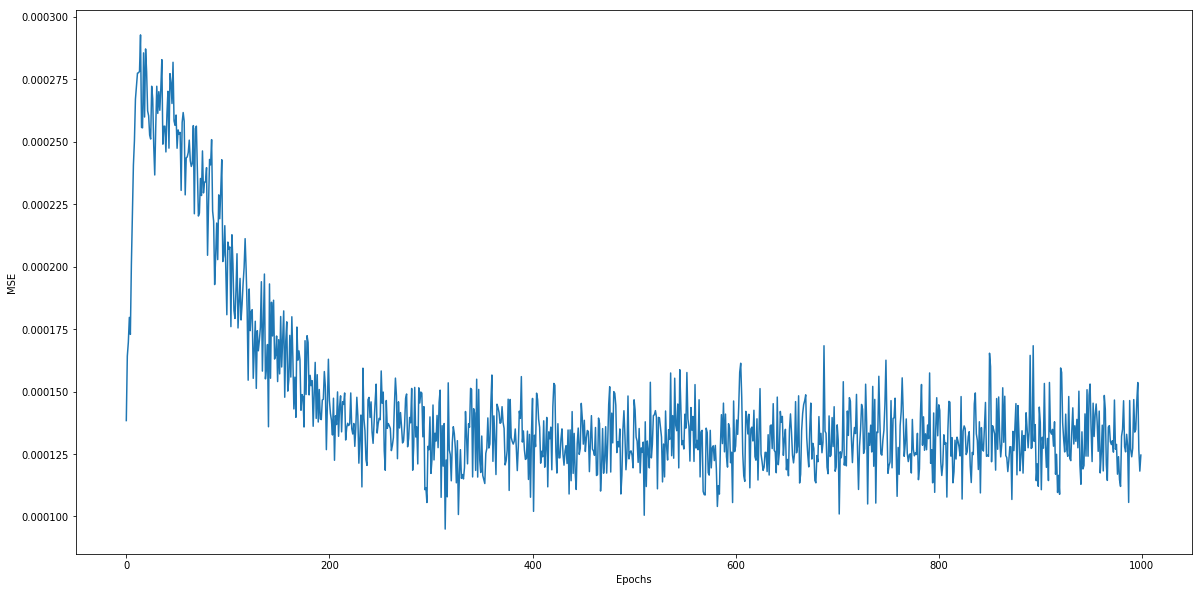

In [9]:
error_arr = rt_rbm.rbm.get_reconstruct_error_arr()

plt.figure(figsize=(20, 10))
plt.plot(error_arr)
plt.ylabel("MSE")
plt.xlabel("Epochs")
plt.show()